In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, Math

# 11)
## d)

$$ H_0: \: \xi \sim p_0(x)=R(0,1) \qquad H_1: \: \xi \sim p_1(x)=\frac{e^{1-x}}{e-1}\{(0,1)\} $$
$$ F_0(x) = x \qquad F_1(x) = \int_0^x \frac{e}{e-1}e^{-t}dt=\frac{e}{e-1}(1-e^{-x}) $$
$$ G: \: x_{min}<C \qquad \xi_{min} \sim (1-F(x))^n $$
$$ P(x_{min} \le C | H_0)=(1-F_0(C))^n=\alpha \qquad C=1-\sqrt[n]{\alpha} $$
$$ W=P(\vec{x}_n \in G | H_1)=(1-F_1(C))^n=\left(1-\frac{e}{e-1}(1-e^{\sqrt[n]{\alpha}-1})\right)^n $$
$$ \alpha_2 = 1-W $$
Состоятельность: $W\to 1$ при $n \to \infty$?
$$ e^{e^{\frac{1}{n}\ln \alpha}}=e^{1+\frac{1}{n}\ln \alpha + o(\frac{1}{n})} $$
$$ \left(1 - \frac{e}{e-1}(1-e^{\frac{1}{n}\ln \alpha + o(\frac{1}{n})})\right)^n=\left(1-\frac{e}{e-1}(1-\frac{1}{n}\ln \alpha + o(\frac{1}{n}))\right)^n= $$
$$ =\left(\frac{-1}{e-1}+\frac{e}{e-1}\frac{1}{n}\ln \alpha + o(\frac{1}{n})\right) $$ 
$$ \exists N_0: \: \forall n \ge N_0 \rightarrow \left| \frac{-1}{e-1}+\frac{e}{e-1}\frac{1}{n}\ln \alpha + o(\frac{1}{n}) \right| \le
 |\frac{1}{e-1}| + \frac{1}{n}(|\frac{e}{e-1}\ln \alpha| + |o(1)|) < 1 $$
$$ \implies \forall \varepsilon > 0 \ \exists N:\: \forall n \ge N \rightarrow W < \varepsilon $$
Несостоятельный критерий.

# 12)

In [35]:
alpha= .2

vals = [1, 2, 3, 4]

rho0 = np.array([1/4, 1/4, 1/6, 1/3])
rho1 = np.array([1/4, 1/4, 1/4, 1/4])

h0 = np.outer(rho0, rho0)
h1 = np.outer(rho1, rho1)

l = h1 / h0

h0pd = pd.DataFrame(h0, index=vals, columns=vals)
h1pd = pd.DataFrame(h1, index=vals, columns=vals)
lpd = pd.DataFrame(l, index=vals, columns=vals)

display(Math(r'H_0:'), h0pd)
display(Math(r'H_1:'), h1pd)
display(Math(r'l:'), lpd)


<IPython.core.display.Math object>

,1,2,3,4
1,0.062500,0.062500,0.041667,0.083333
2,0.062500,0.062500,0.041667,0.083333
3,0.041667,0.041667,0.027778,0.055556
4,0.083333,0.083333,0.055556,0.111111


<IPython.core.display.Math object>

,1,2,3,4
1,0.0625,0.0625,0.0625,0.0625
2,0.0625,0.0625,0.0625,0.0625
3,0.0625,0.0625,0.0625,0.0625
4,0.0625,0.0625,0.0625,0.0625


<IPython.core.display.Math object>

,1,2,3,4
1,1.00,1.00,1.500,0.7500
2,1.00,1.00,1.500,0.7500
3,1.50,1.50,2.250,1.1250
4,0.75,0.75,1.125,0.5625


$$G: l \ge C \qquad P(l\ge C | H_0)\le 0.2$$
$$G: (3,3), (2,3), (3,2), (1,3), (3,1)$$

In [36]:
from fractions import Fraction

G = np.array([[2,2], [1,2], [2, 1], [0,2], [2,0]]).T.reshape(2, 5)

C = Fraction(np.sum(l[G[0], G[1]]))
alpha1 = Fraction(np.sum(h0[G[0], G[1]])).limit_denominator()
W = Fraction(np.sum(h1[G[0], G[1]]))
alpha2 = 1-W

display(Math(r'C=\frac{{{num}}}{{{den}}}'.format(num = C.numerator, den = C.denominator)))
display(Math(r'\alpha_1=\frac{{{num}}}{{{den}}}'.format(num = alpha1.numerator, den = alpha1.denominator)))
display(Math(r'W=\frac{{{num}}}{{{den}}}'.format(num = W.numerator, den = W.denominator)))
display(Math(r'\alpha_2=\frac{{{num}}}{{{den}}}'.format(num = alpha2.numerator, den = alpha2.denominator)))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 13)

$$n = 139 \qquad m=1000$$
$$ \xi_1 \sim N(a, \varphi_1^2) \qquad \eta_1 \sim N(b, \psi_1^2) $$
$$ \xi_2 \sim N(c, \varphi_2^2) \qquad \eta_2 \sim N(d, \psi_2^2) $$
$$ S_{1n}=5.722 \qquad S_{1m}=6.161$$
$$ S_{2n}=4.612 \qquad S_{2m}=5.055$$
$$ H_0: \: \varphi_1^2=\psi_1^2 \quad \varphi_2^2=\psi_2^2$$
$$ H_1: \: \varphi_1^2\neq \psi_1^2 \quad \varphi_2^2\neq \psi_2^2$$
Если $H_0$ верна, то
$$\Delta = \frac{S_x^{2}}{S_y^{2}} \sim F(n-1, m-1)$$
$$ P(|\Delta| \ge C) = \alpha \qquad \alpha = 0.05$$
$$ C_1 = F_{\frac{\alpha}{2}}(138, 999)$$
$$ C_2 = F_{1- \frac{\alpha}{2}}(138, 999)$$

In [37]:
c1 = float(stats.f.ppf(0.025, 138, 999))
c2 = float(stats.f.ppf(0.975, 138, 999))
display(Math(rf"C_1 = {c1:.3}"))
display(Math(rf"C_2 = {c2:.4}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>


$$ \frac{S_{1n}^2}{S_{1m}^2}=0.86 \qquad \frac{S_{2n}^2}{S_{2m}^2}=0.83$$
$\Rightarrow$ нет оснований отвергнуть $H_0$

$$ W(\phi^2, \psi^2)= 1 - P(C_1 < \frac{\psi^2}{\phi^2} < C_2) $$

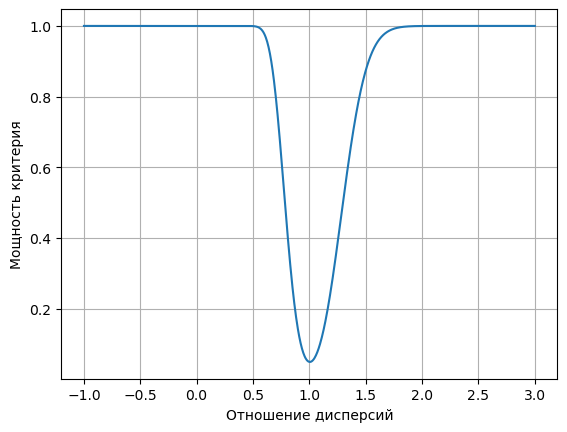

In [42]:

x = np.linspace(-1, 3, 1000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.f.sf(c2 * x, 138, 999) + stats.f.cdf(c1 * x, 138, 999))
ax.set_ylabel("Мощность критерия")
ax.set_xlabel("Отношение дисперсий")
ax.grid()

# 14)

$$ \xi \sim N(a, \sigma_x^2) \qquad \eta \sim N(b, \sigma_y^2) $$ 
$$ \sigma_x^2=2 \qquad \sigma_y^2 = 1 $$
$$ x = \{-1.11, -6.10, 2.42\} \qquad y=\{-2.29, -2.91\} $$
$$ H_0: \: a=b \qquad H_1: \: a > b $$
$$ \alpha = 0.05 $$
Если $H_0$ верна, то
$$ \Delta = \frac{\bar x - \bar y}{\sqrt{\frac{\sigma_x^2}{n}+\frac{\sigma_y^2}{m}}} \sim N(0,1) $$

$$ G: \: \Delta \ge C \qquad P(\Delta \ge C | H_0) = \alpha $$
$$ C = U_{1-\alpha} $$

In [39]:
C = float(stats.norm.ppf(0.95))
display(Math(rf"C = {C:.4}"))

<IPython.core.display.Math object>

In [40]:
delta = np.mean([-1.11, -6.10, 2.42]) - np.mean([-2.29, -2.91])
delta /= np.sqrt(2/3 + 1/2)
display(Math(rf"\tilde \Delta = {delta:.4}"))

<IPython.core.display.Math object>

$$ \tilde \Delta < C $$
$\Rightarrow$ нет оснований отвергать $H_0$

$$ W(a, b) = 1 - P\left(\frac{a-b}{\sqrt{\cfrac{\sigma_x^2}{n}+\cfrac{\sigma_y^2}{m}}} > C\right) $$

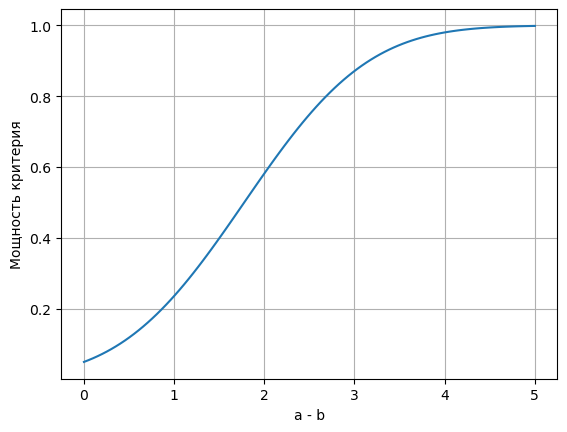

In [41]:
x = np.linspace(0, 5, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.norm.sf(C - x / np.sqrt(2/3 + 1/2)))
ax.set_ylabel("Мощность критерия")
ax.set_xlabel("a - b")
ax.grid()